# ROB535 Self-driving Cars: Python Tutorial & Preliminaries

The first part of this tutorial was originally written by [Justin Johnson](https://web.eecs.umich.edu/~justincj/) for Stanford cs231n. See the [original tutorial](https://cs231n.github.io/python-numpy-tutorial/).

This version has been adapted for the Fall 2023 edition of ROB535/NA565/ME599.

## Introduction

We expect that many of you will have some experience with Python and numpy; for the rest of you, this section will serve as a quick crash course both on the Python programming language and on the use of Python for scientific computing.

Some of you may have previous knowledge in Matlab, in which case we also recommend the numpy for Matlab users page [NumPy for MATLAB users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html).

In this tutorial, we will cover:

* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting, Advanced operations
* Matplotlib: Plotting, Subplots, Images
* Linear Algebra: Vector linear operation, Vector Norm, Matrix deternimant, Matrix rank and nullity, SVD and QR factorization
* Scipy: Multidimensional image processing, Sparse arrays, Least-squares minimization

## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [8]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [13]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [15]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [17]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [20]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [22]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [24]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [26]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [28]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.81987417 0.3571157 ]
 [0.49158157 0.149708  ]]


### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [33]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [36]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [39]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [42]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [44]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [47]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [49]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [52]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [54]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [56]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [59]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [61]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation. Or google as you face them!

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [69]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

###Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [74]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [76]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [78]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [80]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [82]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [85]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [88]:
print(v @ w)

219


In [90]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [92]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [95]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [104]:
print(x)
print("transpose\n", x.T)

[[1 2]
 [3 4]]
transpose
 [[1 3]
 [2 4]]


In [106]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [112]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [115]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [117]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [120]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [126]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [128]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [130]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [132]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [134]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

### Miscellaneous

Numpy can perform some advanced operations like stacking, flattening, sorting, and searching.

In [138]:
# concatenate arrays along rows and columns

x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])

print("row-wise\n", np.concatenate((x, y))) # concatenates along the rows or axis = 0
print("column-wise\n", np.concatenate((x, y), axis = 1)) # concatenates along the columnns or axis = 1

row-wise
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
column-wise
 [[1 2 5 6]
 [3 4 7 8]]


In [140]:
# Stacking row-wise, column-wise, and depth-wise

x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print("row-wise\n", np.hstack((x, y))) # stacking Along rows
print("column-wise\n", np.vstack((x, y))) # stacking Along columns
print("depth-wise\n", np.dstack((x, y))) # stacking Along depth
print("increased rank\n", np.dstack((x, y)).shape) # the rank has increased to 3

row-wise
 [1 2 3 4 5 6]
column-wise
 [[1 2 3]
 [4 5 6]]
depth-wise
 [[[1 4]
  [2 5]
  [3 6]]]
increased rank
 (1, 3, 2)


In [142]:
# Sorting a numpy array

x = np.array([3, 2, 0, 1])
print("1D array sort\n", np.sort(x))

x = np.array([[3, 2, 4], [5, 0, 1]])
print("2D array sort column-wise\n", np.sort(x)) # if the axis is not specified the sorting occurs along axis = 1 (column-wise)
print("2D array sort row-wise\n", np.sort(x, axis = 0)) # sorting along axis = 0 (row-wise)

1D array sort
 [0 1 2 3]
2D array sort column-wise
 [[2 3 4]
 [0 1 5]]
2D array sort row-wise
 [[3 0 1]
 [5 2 4]]


In [144]:
# Flattening a numpy array that can be done using the instance method and using np.reshape()

x = np.array([[1,2], [3,4]])
print(x.flatten()) # flattens a 2D numpy array along axis = 0
print(x.reshape(-1)) # should display the same result as above line

[1 2 3 4]
[1 2 3 4]


In [146]:
# Searching in a numpy array
x = np.arange(6).reshape(2,-1)

print(x)
print(np.argmax(x)) # flattens the 2D array and displays the index of the maximum value
print("max row-wise\n", np.argmax(x, axis=0)) # displays the indices of maximum values along axis = 0 (row-wise)
print("max column-wise\n", np.argmax(x, axis=1)) # displays the indices of maximum values along axis = 1 (column-wise)

print(np.argmin(x)) # flattens the 2D array and displays the index of the minimum value
print("min row-wise\n", np.argmin(x, axis=0)) # displays the indices of minimum values along axis = 0 (row-wise)
print("min column-wise\n", np.argmin(x, axis=1)) # displays the indices of minimum values along axis = 1 (column-wise)

[[0 1 2]
 [3 4 5]]
5
max row-wise
 [1 1 1]
max column-wise
 [2 2]
0
min row-wise
 [0 0 0]
min column-wise
 [0 0]


In [148]:
# Searching in a numpy array

x = np.array([1, 2, 3, 4, 5, 4, 4])
print(np.where(x == 4)) # searches for the value 4 in the array and displays its corresponding indices

# You could also conduct advanced searches like
print("even numbers\n", np.where(x%2 == 0)) # searches for the even numbers in the array and displays its corresponding indices

(array([3, 5, 6]),)
even numbers
 (array([1, 3, 5, 6]),)


This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## Matplotlib

Matplotlib is a plotting library. This section gives a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [153]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


By running this special iPython command, we will be displaying plots inline:

In [156]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

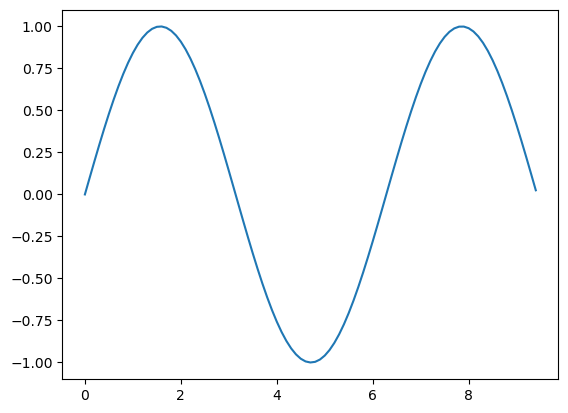

In [160]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

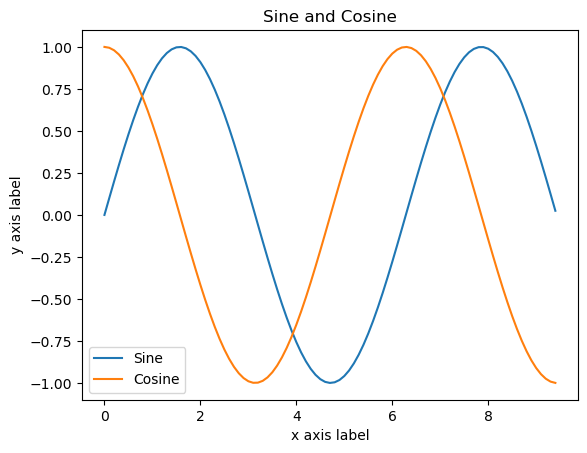

In [163]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots

You can plot different things in the same figure using the subplot function. Here is an example:

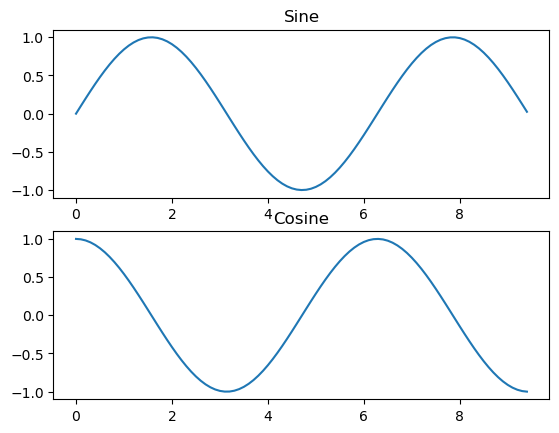

In [169]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## Linear Algebra
Linear operation, vector norm, matrix determinant, rank-nullity, SVD and QR factorization, least-squares, multi-objective least squares in numpy and scipy. Check Lecture 2 slides for more information.

### Linear equation and operation

In [2]:
import numpy as np
import numpy.linalg as LA

# Initialize linear independent vectors
v1 = np.array([1, 0, 0])
v2 = np.array([0, 1, 0])
alpha1 = 0.5
alpha2 = 0.5

# Linear combination
v3 = alpha1 * v1 + alpha2 * v2
print("Linear combination of v1 and v2: v3 =",v3)


Linear combination of v1 and v2: v3 = [0.5 0.5 0. ]


### Vector Norm

In [5]:
# Calculate norm of vector using numpy.linalg.norm
v4 = np.arange(9) - 4
print("v4:", v4)

# 0-norm (number of non-zeros), ord=0
v4_0norm = LA.norm(v4, ord=0)
print("0-norm of v4: ",v4_0norm)

# 1-norm (Manhattan norm), ord=1
v4_1norm = LA.norm(v4, ord=1)
print("1-norm of v4: ",v4_1norm)

# 2-norm (Euclidean norm), ord=None
v4_2norm = LA.norm(v4)
print("2-norm of v4: ",v4_2norm)

# inf-norm (supremum norm), ord=np.inf
v4_infnorm = LA.norm(v4, np.inf)
print("inf-norm of v4: ",v4_infnorm)

# more vector norm
v4_6norm = LA.norm(v4, ord=6)
print("6-norm of v4: ",v4_6norm)

v4: [-4 -3 -2 -1  0  1  2  3  4]
0-norm of v4:  8.0
1-norm of v4:  20.0
2-norm of v4:  7.745966692414834
inf-norm of v4:  4.0
6-norm of v4:  4.6244115348978445


### Matrix determinant

In [7]:
# Initialize matirx (m * n)
m1 = np.array([[1, 2],
               [3, 4]])
m2 = np.array([[[1, 2],
                [3, 4]],
               [[1, 2],
                [2, 1]],
               [[1, 3],
                [3, 1]]])

# Calculate matrix determinant
det1 = LA.det(m1)
det2 = LA.det(m2)
print("Determinant of 2D array m1: ", det1)
print("Determinant a stack of 2D matrices m2: ", det2)

Determinant of 2D array m1:  -2.0000000000000004
Determinant a stack of 2D matrices m2:  [-2. -3. -8.]


### Matrix rank and nullity

In [10]:
m3 = np.eye(4)
m4 = np.eye(4)
m4[-1, -1] = 0
print("Full rank matrix m3: ", m3)
print("Rank deficient matrix m4: ", m4)

# Calculate rank of matrix using numpy.linalg.matrix_rank
rank_m3 = LA.matrix_rank(m3)
rank_m4 = LA.matrix_rank(m4)
print("Rank of m3: ", rank_m3)
print("Rank of m4: ", rank_m4)

# Calculate nullity using n - R (from rank-nullity theorem)
n_m3 = m3.shape[1]
n_m4 = m4.shape[1]
null_m3 = n_m3 - rank_m3
null_m4 = n_m4 - rank_m4
print("Nullity of m3: ", null_m3)
print("Nullity of m4: ", null_m4)

Full rank matrix m3:  [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Rank deficient matrix m4:  [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
Rank of m3:  4
Rank of m4:  3
Nullity of m3:  0
Nullity of m4:  1


### SVD factorization

In [20]:
m5 = np.random.randn(9, 6)
print(m5)

# Reconstruction based on full SVD, 2D case
U, S, Vh = np.linalg.svd(m5, full_matrices=True)
print("U.shape:", U.shape, " S.shape:", S.shape, " Vh.shape:", Vh.shape)
print("Reconstruction: ", np.allclose(m5, np.dot(U[:, :6] * S, Vh)))

# Reconstruction based on reduced SVD, 2D case
U, S, Vh = np.linalg.svd(m5, full_matrices=False)
print("U.shape:", U.shape, " S.shape:", S.shape, " Vh.shape:", Vh.shape)
print("Reconstruction: ", np.allclose(m5, np.dot(U * S, Vh)))

[[ 0.14524539  0.9697309  -0.79620347  0.74374554 -0.26389941 -1.14849654]
 [-0.63430979  0.74394014  0.39779498  1.13199278 -0.70238225  0.76289802]
 [ 1.25803974  0.04838592  0.25612601  1.4631484   0.28777273 -1.7196747 ]
 [-0.99433203 -0.9537981  -0.26779641 -1.01398132 -0.9934794   0.38179855]
 [ 0.18123307 -0.70042567 -0.4145649  -1.23296027 -0.76851112  1.24177827]
 [ 0.75676509 -2.19510657  0.25146912  0.60461999 -0.73823878  0.34298572]
 [ 0.12763116  0.38320389  0.79305761  0.10590974  1.43133411 -1.01942655]
 [-0.29333397  0.31848186 -0.13722408  0.23803313  0.99572505  1.00833058]
 [-0.10330748  2.27330773  0.40049141 -1.85262177 -0.72772775  0.75533711]]
U.shape: (9, 9)  S.shape: (6,)  Vh.shape: (6, 6)
Reconstruction:  True
U.shape: (9, 6)  S.shape: (6,)  Vh.shape: (6, 6)
Reconstruction:  True


### QR factorization

In [50]:
# Reconstruction based on QR, 2D case
m6 = np.random.randn(9, 6)
Q, R = np.linalg.qr(m6)
print("Q^T*Q = I: ", np.allclose(Q.T @ Q, np.eye(6)))
print("Reconstruction: ", np.allclose(m6, np.dot(Q, R)))

Q^T*Q = I:  True
Reconstruction:  True


## Scipy

### Image Filtering

Filtering is widely used in removing unwanted sources of variation, keeping only the information relevant for a task. In this section, we introduce some linear filtering metrics, including box filter and Gaussian filter.

To perform image operations, run the following code to import the modules that you'll need, and to download the images. You are welcome to modify this code (e.g., by importing more modules).

In [67]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy
import imageio # For loading images
import urllib.request
import skimage
from PIL import Image

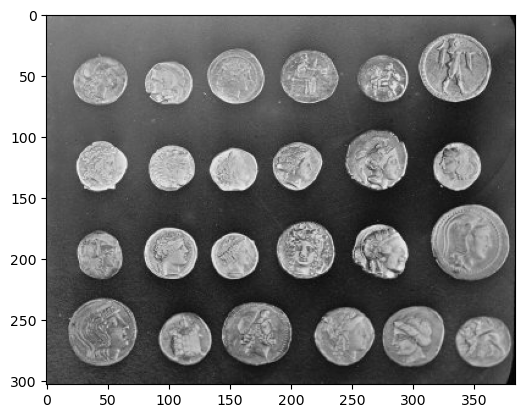

In [69]:
# Download the images that you'll need
filename = os.listdir(skimage.data_dir)[2]
image = Image.open(os.path.join(skimage.data_dir, filename)).convert("RGB")
im = np.asarray(image)
plt.imshow(im)


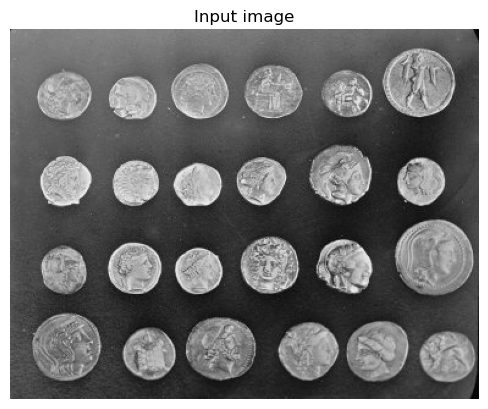

In [71]:
# convert to grayscale
im = im.mean(2)/255.

plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

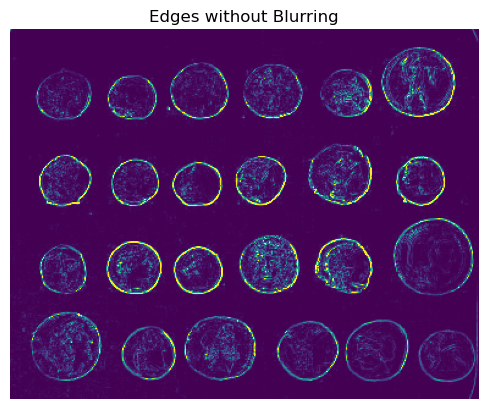

In [73]:
# i) Edges without blurring
# using the horizontal and vertical gradient filters [1 -1] and [1 −1]⊤
M=np.array([1,-1])
dx=np.reshape(M,[1,2])
dy=np.reshape(M,[2,1])
Ix = scipy.ndimage.convolve(im, dx)
Iy = scipy.ndimage.convolve(im, dy)
edges = Ix**2. + Iy**2.

plt.figure()
plt.title('Edges without Blurring')
plt.axis('off')
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))

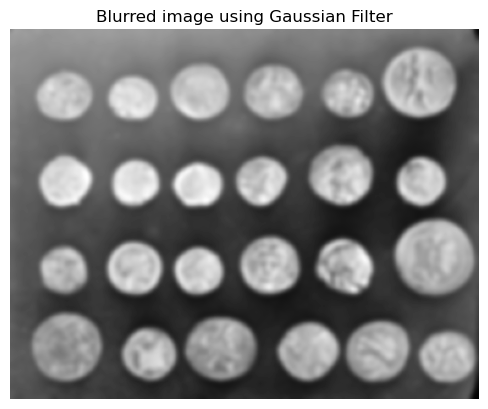

In [75]:
# ii) blurred image using Gaussian Filter
A=np.zeros((11,11))

for i in range(11):
  for j in range(11):
    A[i,j]=(1/(2*np.pi*4))*(np.exp(-(((i-5)**2)+((j-5)**2))/8))
im1= scipy.ndimage.convolve(im, A)

plt.figure()
plt.title('Blurred image using Gaussian Filter')
plt.axis('off')
plt.imshow(im1, cmap='gray')

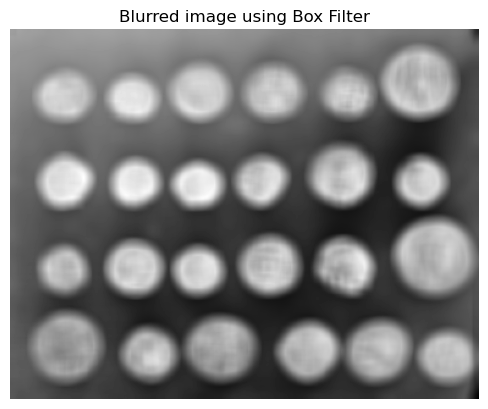

In [77]:
# iii) blurred image using Box Filter
a=11
f=1/121*np.ones((a,a))
im2 = scipy.ndimage.convolve(im, f)

plt.figure()
plt.title('Blurred image using Box Filter')
plt.axis('off')
plt.imshow(im2, cmap='gray')

### Sparse arrays

Sparse arrays are arrays where many entries are zeros. 

 Sparse arrays are useful because they allow for simpler, faster, and/or less memory-intensive algorithms for linear algebra (scipy.sparse.linalg) or graph-based computations (scipy.sparse.csgraph), but they are generally less flexible for operations like slicing, reshaping, or assignment.

 Here we use ```scipy.sparse``` to construct a sparse matrix. COO and CSR (Compressed Sparse Row) are two available sparse matrix types.

```coo_array((data, (i, j)), [shape=(M, N)])``` construct matrix from three arrays:

1. data[:] the entries of the matrix, in any order

2. i[:] the row indices of the matrix entries

3. j[:] the column indices of the matrix entries


In [7]:
from scipy import sparse
# Constructing a matrix using ijv format
row  = np.array([0, 3, 1, 0])
col  = np.array([0, 3, 1, 2])
data = np.array([4, 5, 7, 9])
sparse.coo_array((data, (row, col)), shape=(4, 4)).toarray()

array([[4, 0, 9, 0],
       [0, 7, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 5]])

```csr_array((data, indices, indptr), [shape=(M, N)])``` is the standard CSR representation where the column indices for row i are stored in
1. indices[indptr[i]:indptr[i+1]] and their corresponding values are stored in data
2. [indptr[i]:indptr[i+1]]. If the shape parameter is not supplied, the matrix dimensions are inferred from the index arrays.

In [17]:
indptr = np.array([0, 2, 3, 6])
indices = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
mat = sparse.csr_array((data, indices, indptr), shape=(3, 3))
print(mat.toarray())

[[1 0 2]
 [0 0 3]
 [4 5 6]]


We can use ```data``` to check the data stored in CSR matrix.

In [18]:
print(mat.data)

[1 2 3 4 5 6]


To calculate the number of nonzeros in a sparse matrix, we can use function ```count_nonzero()```.

In [24]:
print("the number of nonzeros:", mat.count_nonzero())

the number of nonzeros: 6


### Least-squares minimization

In [6]:
# Linear least squares
import numpy as np
from scipy.linalg import lstsq

A = np.random.rand(100,6)
b = np.random.rand(100,1)
x, res, rnk, s = lstsq(A, b)
print(x,'\n',res,'\n',rnk,'\n',s)
print("residual: ", np.linalg.norm(A.dot(x)-b)**2)

[[0.12723292]
 [0.09470588]
 [0.31328976]
 [0.24783145]
 [0.13639733]
 [0.1245566 ]] 
 [10.48517502] 
 6 
 [12.12532873  3.49041372  3.18299718  2.99753667  2.601445    2.42343123]
residual:  10.48517502461137


In this example we find a minimum of the Rosenbrock function without bounds on independent variables.

In [7]:
# Sparse least squares
import scipy
# https://stackoverflow.com/questions/31895814/sparse-least-square-regression
A = scipy.sparse.rand(1500,1000,0.01) #Create a random instance
b = scipy.sparse.rand(1500,1,0.5)
x = scipy.sparse.linalg.spsolve(A.T*A,A.T*b)
x_lsqr = scipy.sparse.linalg.lsqr(A,b.toarray()) #Just for comparison
print(scipy.linalg.norm(x_lsqr[0]-x))

0.0003505713388107106


In [9]:
# Nonlinear least squares
from scipy.optimize import least_squares

def fun_rosenbrock(x):
    return np.array([10 * (x[1] - x[0]**2), (1 - x[0])])


x0_rosenbrock = np.array([2, 2])
res_1 = least_squares(fun_rosenbrock, x0_rosenbrock)
print("solution:", res_1.x)
print("Value of the cost function at the solution:", res_1.cost)
print("First-order optimality measure", res_1.optimality)

solution: [1. 1.]
Value of the cost function at the solution: 9.866924291084687e-30
First-order optimality measure 8.892886493421953e-14
